In [2]:
import os
import json
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# 데이터 경로 설정
base_dir = r"E:\Data\028.한국인 피부상태 측정 데이터\3.개방데이터\1.데이터\Training\02.라벨링데이터\TL\1. 디지털카메라\0002"
image_path = r'E:\Data\028.한국인 피부상태 측정 데이터\3.개방데이터\1.데이터\Training\01.원천데이터\TS\1. 디지털카메라\0002\0002_01_F.jpg'

In [3]:
# 라벨링 데이터 목록
json_file_names = [
    "0002_01_F_00.json",
    "0002_01_F_01.json",
    "0002_01_F_02.json",
    "0002_01_F_03.json",
    "0002_01_F_04.json",
    "0002_01_F_05.json",
    "0002_01_F_06.json",
    "0002_01_F_07.json",
    "0002_01_F_08.json",
]

In [4]:
#라벨링 데이터 딕셔너리 만들기
data = {}
for file_name in json_file_names:
    file_path = os.path.join(base_dir, file_name)
    with open(file_path, 'r', encoding='utf-8') as f:
        data[file_name] = json.load(f)

In [5]:
#저장된 라벨링 데이터 확인
print(data.keys())
print(data["0002_01_F_00.json"])

dict_keys(['0002_01_F_00.json', '0002_01_F_01.json', '0002_01_F_02.json', '0002_01_F_03.json', '0002_01_F_04.json', '0002_01_F_05.json', '0002_01_F_06.json', '0002_01_F_07.json', '0002_01_F_08.json'])
{'info': {'filename': '0002_01_F.jpg', 'id': '0002', 'gender': 'F', 'age': 50, 'date': '2023-07-27', 'skin_type': 0, 'sensitive': 0}, 'images': {'device': 0, 'width': 2136, 'height': 3216, 'angle': 0, 'facepart': 0, 'bbox': [0, 0, 2136, 3216]}, 'annotations': {'acne': None}, 'equipment': {'pigmentation_count': 158}}


In [6]:
try:
    pil_image = Image.open(image_path)
    image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
except Exception as e:
    print(f"이미지를 로드할 수 없습니다: {e}")

In [11]:
#이미지 제대로 불러왔는지 확인
#print(image)

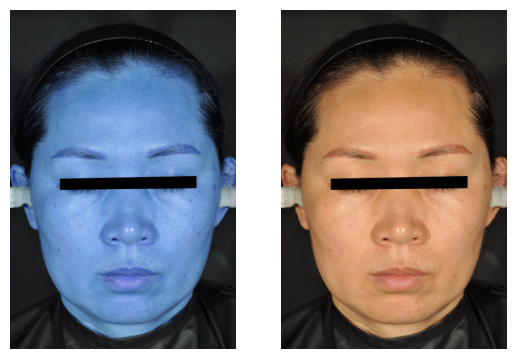

In [12]:
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(pil_image)
plt.axis("off")
plt.show()

In [13]:
#이미지 파일 자르기
cropped_images = {}  # 자른 이미지를 저장할 딕셔너리

for filename, content in data.items():
    # 바운딩 박스 정보 추출
    bbox = content["images"]["bbox"]  # [x1, y1, x2, y2] 형태
    
    # 이미지 자르기
    cropped_image = pil_image.crop(bbox)  # PIL crop 사용
    
    # 자른 이미지를 딕셔너리에 저장
    cropped_images[filename] = cropped_image

    print(f"Cropped image for {filename} added to dictionary.")


Cropped image for 0002_01_F_00.json added to dictionary.
Cropped image for 0002_01_F_01.json added to dictionary.
Cropped image for 0002_01_F_02.json added to dictionary.
Cropped image for 0002_01_F_03.json added to dictionary.
Cropped image for 0002_01_F_04.json added to dictionary.
Cropped image for 0002_01_F_05.json added to dictionary.
Cropped image for 0002_01_F_06.json added to dictionary.
Cropped image for 0002_01_F_07.json added to dictionary.
Cropped image for 0002_01_F_08.json added to dictionary.


In [14]:
selected_images = list(cropped_images.items())[:9]  # 최대 9개의 이미지를 선택

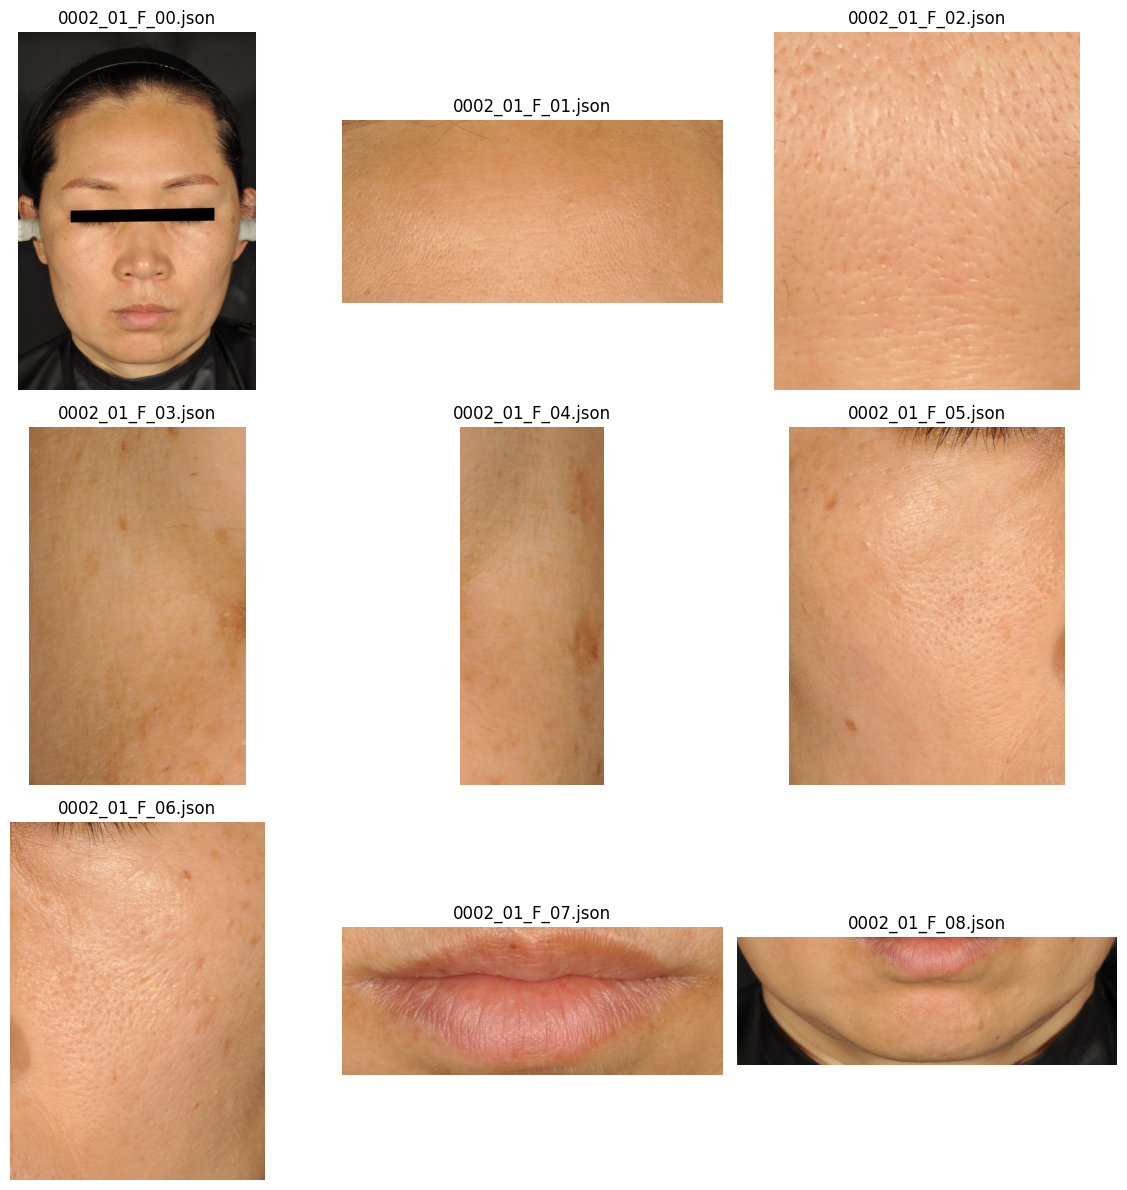

In [16]:
# 3x3 격자로 출력
plt.figure(figsize=(12, 12))  # 전체 Figure 크기 설정
for idx, (filename, image) in enumerate(selected_images):
    plt.subplot(3, 3, idx + 1)  # 3x3 격자에서 idx+1 위치에 그리기
    plt.imshow(image)
    plt.axis("off")  # 축 제거
    plt.title(filename)  # 각 이미지 위에 제목 추가

plt.tight_layout()  # 레이아웃 간격 자동 조정
plt.show()